In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 12.2 MB/s 
     |████████████████████████████████| 1.2 MB 46.8 MB/s 
     |████████████████████████████████| 189 kB 53.0 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 51 kB 307 kB/s 
Mounted at /content/gdrive


In [1]:
from fastbook import *
# !pip install fastai==2.2.7
import fastai
from fastai import *
fastai.__version__
# !-f https://download.pytorch.org/whl/torch_stable.html
# !pip install torch==1.8.1+cpu 
# !pip install torchvision==0.9.1+cpu
# !pip install fastai>=2.3.1
# !pip install ipywidgets
# !pip install voila

'2.2.7'

In [2]:
from fastai.vision.all import *

In [3]:
!python --version

Python 3.7.12


In [4]:
# path = Path('gdrive/MyDrive/Colab Notebooks/Cupboard/fruitveg81')
path = Path('gdrive/MyDrive/Colab Notebooks/Cupboard/GroceryStoreDataset/dataset/train')

In [5]:
Path.BASE_PATH = path
path.ls()

(#2) [Path('Fruit'),Path('Vegetables')]

In [6]:
fns = get_image_files(path)
fns

(#1776) [Path('Fruit/Avocado/Avocado_023.jpg'),Path('Fruit/Avocado/Avocado_007.jpg'),Path('Fruit/Avocado/Avocado_006.jpg'),Path('Fruit/Avocado/Avocado_001.jpg'),Path('Fruit/Avocado/Avocado_038.jpg'),Path('Fruit/Avocado/Avocado_032.jpg'),Path('Fruit/Avocado/Avocado_014.jpg'),Path('Fruit/Avocado/Avocado_029.jpg'),Path('Fruit/Avocado/Avocado_015.jpg'),Path('Fruit/Avocado/Avocado_022.jpg')...]

In [7]:
failed = verify_images(fns)
failed

(#0) []

In [7]:
fruitveg = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 get_y=parent_label,
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.5))

In [8]:
dls = fruitveg.dataloaders(path)

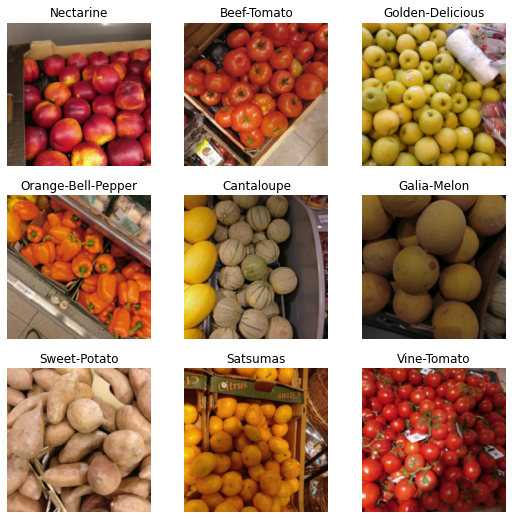

In [9]:
dls.valid.show_batch(max_n=9, nrows=3)

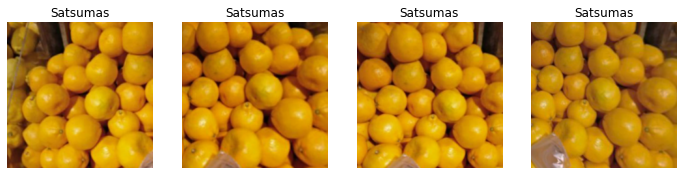

In [10]:
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [11]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,4.471197,3.303911,0.797183,06:41


epoch,train_loss,valid_loss,error_rate,time
0,1.747779,3.128635,0.774648,00:39
1,1.096637,2.731899,0.701408,00:39
2,0.743915,2.673233,0.659155,00:40
3,0.535637,2.554330,0.639437,00:39


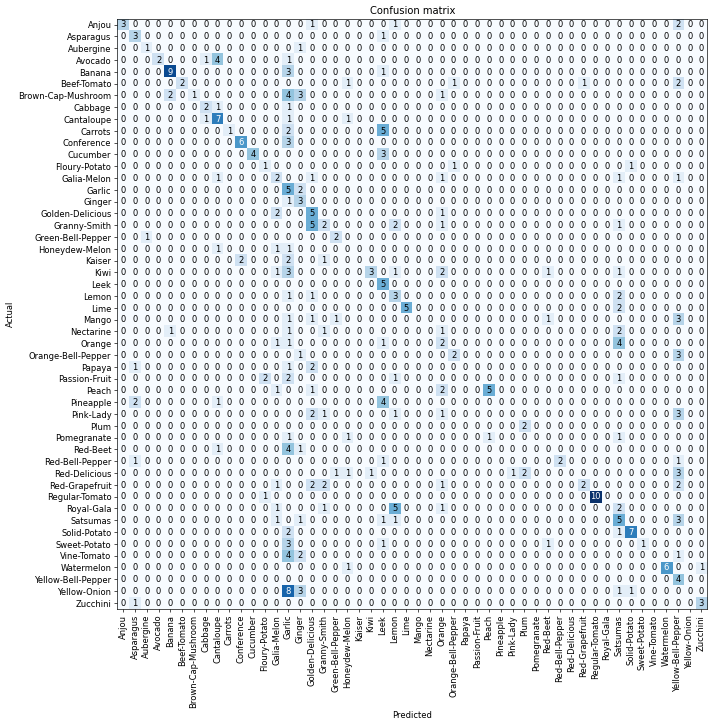

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [13]:
interp.most_confused(min_val=5)

[('Yellow-Onion', 'Garlic', 8),
 ('Carrots', 'Leek', 5),
 ('Granny-Smith', 'Golden-Delicious', 5),
 ('Royal-Gala', 'Lemon', 5)]

In [14]:
learn.export()

In [15]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [16]:
learn_inf = load_learner(path/'export.pkl')

In [17]:
learn_inf.predict(path/'img-4.jpg')

('Carrots',
 tensor(9),
 tensor([1.8748e-04, 6.0860e-03, 4.0044e-02, 2.0843e-03, 2.5728e-01, 3.5201e-05, 2.0676e-04, 1.4946e-02, 8.7390e-03, 3.3567e-01, 2.6861e-03, 1.3730e-03, 3.5389e-03, 1.4469e-03, 1.5686e-01, 3.3210e-02,
         1.2322e-03, 2.5366e-05, 1.4302e-04, 4.0970e-03, 1.1760e-04, 1.4866e-05, 1.0085e-01, 1.4428e-03, 3.1592e-04, 6.9952e-05, 1.4161e-04, 1.4279e-04, 5.7457e-04, 3.2806e-04, 9.4388e-05, 4.5318e-05,
         1.4768e-04, 3.2628e-05, 7.2047e-05, 7.8005e-04, 1.2701e-03, 2.7986e-04, 1.4693e-05, 2.0576e-04, 7.2550e-04, 8.3331e-06, 2.1505e-04, 4.1545e-03, 1.1685e-02, 2.2828e-04, 1.7191e-04, 3.3726e-03,
         1.2926e-03, 1.3025e-03]))

In [18]:
learn_inf.dls.vocab

['Anjou', 'Asparagus', 'Aubergine', 'Avocado', 'Banana', 'Beef-Tomato', 'Brown-Cap-Mushroom', 'Cabbage', 'Cantaloupe', 'Carrots', 'Conference', 'Cucumber', 'Floury-Potato', 'Galia-Melon', 'Garlic', 'Ginger', 'Golden-Delicious', 'Granny-Smith', 'Green-Bell-Pepper', 'Honeydew-Melon', 'Kaiser', 'Kiwi', 'Leek', 'Lemon', 'Lime', 'Mango', 'Nectarine', 'Orange', 'Orange-Bell-Pepper', 'Papaya', 'Passion-Fruit', 'Peach', 'Pineapple', 'Pink-Lady', 'Plum', 'Pomegranate', 'Red-Beet', 'Red-Bell-Pepper', 'Red-Delicious', 'Red-Grapefruit', 'Regular-Tomato', 'Royal-Gala', 'Satsumas', 'Solid-Potato', 'Sweet-Potato', 'Vine-Tomato', 'Watermelon', 'Yellow-Bell-Pepper', 'Yellow-Onion', 'Zucchini']

In [19]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [20]:
img = PILImage.create(btn_upload.data[-1])

In [21]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [22]:
pred,pred_idx,probs = learn_inf.predict(img)

In [23]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Leek; Probability: 0.5168')